In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
data=pd.read_csv('news.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
df['Classifier'] = le.fit_transform(df['label'])
df

,Unnamed: 0,title,text,label,Classifier
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1


In [78]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

y = df['Classifier'].values 

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
text_train, text_test = train_test_split(df['text'], test_size=0.2, random_state=42)


In [82]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [83]:
y_pred=model.predict(X_test)

In [85]:
test_df=pd.DataFrame({'Testing Text':text_test,'Actual Value':Y_test,'Predicted value':y_pred})
test_df

,Testing Text,Actual Value,Predicted value
1357,Will Trump pull a Brexit times ten? What would...,0,0
2080,Clintons Are Under Multiple FBI Investigations...,0,0
2718,Dispatches from Eric Zuesse This piece is cros...,0,0
812,Print \n[Ed. – Every now and then the facade c...,0,0
4886,Nanny In Jail After Force Feeding Baby To Deat...,0,0
...,...,...,...
1512,Tennessee Children with Brittle Bones Suffer i...,0,0
57,Political parties choose their presidential no...,1,1
6092,The Islamist terrorist attacks that took place...,1,1
3403,About 90 minutes before the vice-presidential ...,1,1


In [88]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.92


In [91]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[590,  38],
       [ 69, 570]], dtype=int64)

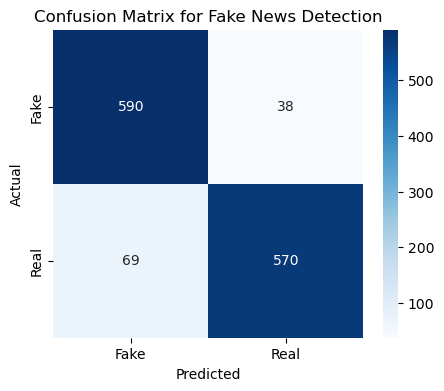

In [93]:
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Fake News Detection")
plt.show()

In [95]:
report = classification_report(Y_test, y_pred, target_names=["Fake News", "Real News"])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

   Fake News       0.90      0.94      0.92       628
   Real News       0.94      0.89      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [114]:
news_text = ["Reliable weather updates come from government agencies like the IMD (India Meteorological Department), NOAA (National Oceanic and Atmospheric Administration), or reputable news channels."]
#news_text_vector = vectorizer.transform(news_text)  
#prediction = model.predict(news_text_vector)
#print("Predicted Label:", prediction[0])

In [108]:
print(model.predict(news_text_vector))

[0]


In [101]:
news_text = ["This is a sample fake news article."]
news_text_vector = vectorizer.transform(news_text)
print(model.predict(news_text_vector))


NotFittedError: The TF-IDF vectorizer is not fitted